0.0


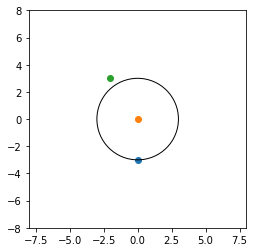

In [45]:
from skgeom.draw import draw
p2 = sg.Point2(0,0)
p3 = sg.Point2(-2,3)
p1 = sg.Point2(0,-3)
print(get_angle(p1,p2,p3))
circle = sg.Circle2(p0,9,sg.Sign.POSITIVE)
draw(circle)
draw(p1)
draw(p2)
draw(p3)

In [43]:
import skgeom as sg
import numpy as np
import math
#calculate angle <point1_point2_point3
def get_angle(point1,point2,point3):
    #calculate dy,dx
    delta_y12 = point1.y() - point2.y()
    delta_y32 = point3.y() - point2.y()
    delta_x12 = point1.x() - point2.x()
    delta_x32 = point3.x() - point2.x()
    
    #initialize slopes
    slope1 = 0
    slope2 = 0
    angle = 0
    
    #if segment 1_2 is a vertical line, calculate the angle formed with segment 2_3 and the x-axis
    if delta_x12 == 0:
        point_x = sg.Point2(point2.x()+5, point2.y())
        
        #if point 1 and point 3 are in the first quadrant, calculate 90-angle formed with x-axis
        if(point3.x() > point2.x() and point3.y() < point2.y() and delta_y12 > 0):
            print('point 3: 1st, point1: 1st')
            angle = 90 - get_angle(point1,point2,point_x)
            return angle
        
        #if point 1 is in the first quadrant and point 3 is in the second quadrant, calculate 90+angle formed with x-axis
        elif(point3.x() > point2.x() and point3.y() > point2.y() and delta_y12 > 0):
            print('point 3: 2nd, point1: 1st')
            angle = 90 + get_angle(point1,point2,point_x)
            return angle
        
    #if segment 2_3 is a vertical line, calculate angle formed with segment 1_2 and the x-axis
    elif delta_x32 == 0:
        point_x = sg.Point2(point2.x()-5, point2.y())
        
        #if point 1 and point 3 are in the fourth quadrant, calculate angle formed with x-axis - 90
        if(point1.x() < point2.x() and point1.y() >= point2.y() and delta_y32 > 0):
            print('point 3: 4th, point1: 4th')
            angle = 90 - np.abs(get_angle(point_x,point2,point1))
            return angle
        
        #if point 3 is in the fourth quadrant and point 1 is in the third quadrant, calculate 90+angle formed with x-axis
        elif(point1.x() < point2.x() and point1.y() <= point2.y() and delta_y32 > 0):
            print('point 3: 4th, point1: 3rd')
            angle = 90 + np.abs(get_angle(point_x,point2,point_1))
            return angle
        
        #if point 1 and point 3 are in the third quadrant
        else:
            print('point 3: 3rd, point 1: 3rd')
            angle = 90 - np.abs(get_angle(point_x,point2,point1))
            return angle
    else:
        slope1 = float(delta_y12 / delta_x12)
        slope2 = float(delta_y32 / delta_x32)
        
        #if angle is with horizontal line
        if slope1 == 0 and slope2 != 0:
            angle = np.arctan(slope2)
        elif slope2 == 0 and slope1 != 0:
            angle = np.arctan(slope1)
        elif slope1 == -slope2:
            angle = math.pi/2
        else:
            angle = np.arctan((slope1-slope2)/(1+slope1*slope2))
            
    return angle*180/math.pi

In [ ]:
import skgeom as sg
import numpy as np

class skgeom_utilities:
    
    #getting the angle between three points
    def get_angle(point1,point2,point3):
        
        angle = None
        slope1, slope2 = 0, 0
        try:
            slope1 = float((point1.y()-point2.y())/(point1.x()-point2.x()))
            slope2 = float((point3.y()-point2.y())/(point3.x()-point2.x()))
            if(slope1*slope2==-1):
                angle = math.pi/2
            else:
                angle = np.arctan(np.abs((slope1-slope2)/(1+slope1*slope2)))
                
        except RuntimeError:
            
            #if angle is with horizontal line
            if slope1 == 0 and slope2 != 0:
                angle = np.arctan(np.abs(slope2))
            elif slope2 == 0 and slope1 != 0:
                angle = np.arctan(np.abs(slope1))

            #if angle is with a vertical (undefined) line
            else:
                if(point1.x() == point2.x()):
                    return (90 - get_angle(sg.Point2(point2.x() + 5,point2.y()),point2,point3))
                elif(point2.x() == point3.x()):
                    return (90 - get_angle(point1,point2,sg.Point2(point2.x() + 5,point2.y())))
                
        return angle*180/math.pi
